# Fitting a Linear Regression Function

### Introduction

In the previous section, we discussed our formula for linear regression, $y$ = $mx + b$.  And we saw how we can use our SciKit Learn library to discover the estimated values for $m$ and $b$.  But how does SciKit Learn, or any linear regression model come up with these numbers.  In this lesson we'll start finding out.

### How SciKit Learn "Fits"

Ok, let's again use sklearn to find the parameters of our linear regression model.  Let's again initialize some data

In [21]:
import numpy as np

sales = np.array([330, 780, 1130, 1310, 1780])
ad_spends = np.array([800, 1500, 2000, 3500, 4000])
reshaped_ad_spends = ad_spends.reshape(5, -1)

And then pass data into our model.

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# create the initial model
model.fit(reshaped_ad_spends, sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now, once we call the `fit` function, the model comes up with numbers for both the coefficient and the intercept.

In [23]:
model.coef_

array([0.38675261])

In [24]:
model.intercept_

153.26385079539216

When we `fit` the line, we are trying to find the line that best matches the data that we pass through the model - our inputs and outcomes.  By "best matches" we mean, the line that comes closes to the data.  So how do we get a line that comes closes to the data?

These are the steps.

1. Start with an initial model: that is, initial values for $m$ and $b$, these numbers can be anything.
2. Evaluate a model by calculating how close the model comes to predicting our observed data
3. Update the parameters of our linear regression model and evaluate this updated model
4. Stop when we have a linear regression model that comes as close as possible to the data

In the rest of this lesson, we'll examine the first two steps, building an initial model and evaluating the model.

### Building the initial model

It's easy enough to build an initial model.  All we need to do is choose some numbers for our values of $m$ and $b$.  So we'll choose $m = .6$ and $b = 100$.  Which means that our function is:

$$y = .6x + 100$$ 
or 

$$tshirt\_sales = .6*ad\_spend + 100$$ 

This is what this model looks like next to our data.

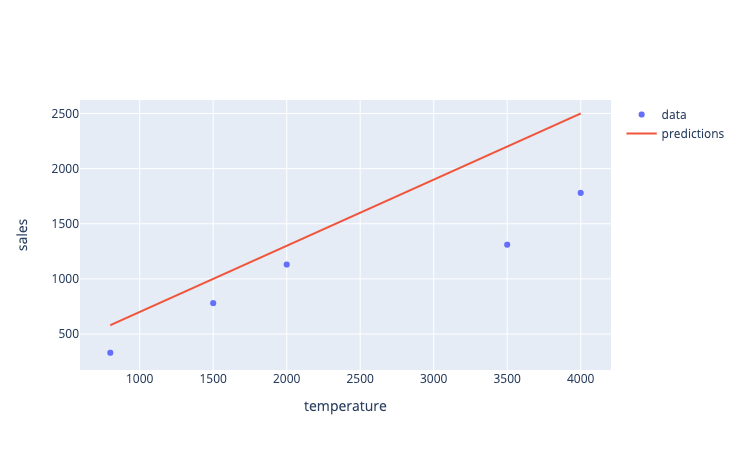

In [27]:
import plotly.graph_objects as go
import numpy as np
prediction_vals = .6*inputs + 100
diffs =  outcomes - prediction_vals
errors = dict(type='data', symmetric=False, array=diffs)

data_trace = go.Scatter(x = ad_spends, 
                              y = sales, 
                              mode = 'markers', 
                        name = 'data')

prediction_trace = go.Scatter(x = ad_spends, 
                              y = prediction_vals, 
                              mode = 'lines',
                              name = 'predictions')
layout = {'xaxis': {'title': 'temperature'}, 'yaxis': {'title': 'sales'}}
go.Figure(data = [data_trace, prediction_trace], layout = layout)

So remember that the blue dots represent the actual data of each advertising budget dollars and it's corresponding monthly sales.  And the orange line is the predictions from our initial linear regression model.

Our goal is that our model predicts our observed -- or graphically that our orange line comes close to the blue dots.

## Evaluating the model

We evaluate the model by seeing how close our predicted outcomes come to the actual observed outcomes.  The closer our model is to predicting the actual data, the better.  Let's make this closeness more visual.

In [ ]:
diffs =  outcomes - prediction_vals
errors = dict(type='data', symmetric=False, array=diffs)

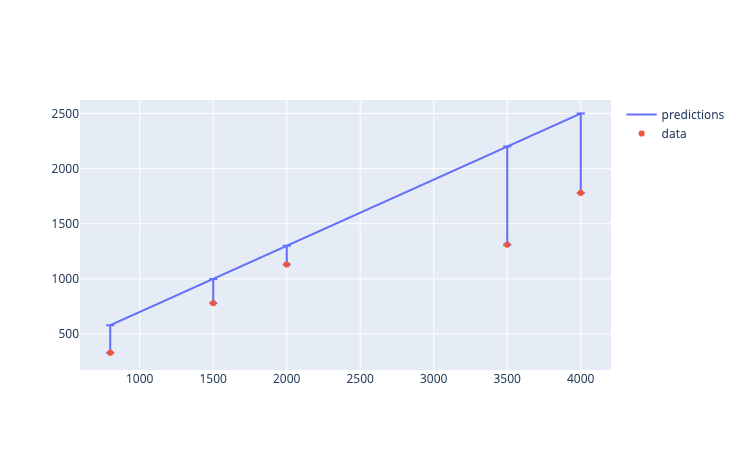

In [29]:
prediction_errors_trace = go.Scatter(x = ad_spends, 
                              y = prediction_vals, 
                              error_y = errors,
                              mode = 'lines',
                              name = 'predictions')
go.Figure(data = [prediction_errors_trace, data_trace])

So each vertical line represents the difference between the t shirt sales that our model predicts for a given amount of advertising spent, and what we actually observed.  

Let's focus in on that first red line.  Our model predicts t-shirt sales of 400 while the observed t-shirt sales was 330.  The vertical line shows the difference.

Now let's turn these red lines into a number.  We do this by calculating the *difference* between the actual data and what our model expects.  We call this difference our **error**.

> error = actual - expected

Now just like we had standard symbols to represent our components of linear regression (y = mx + b), we also have symbols to represent the formula above. Here they are: 

> * $y^{(i)}$ represent our actual, or observed target variables
> * $\bar{y^{(i)}}$ (pronounced y hat) represents our predicted output 
> * $\epsilon$ (epsilon) represents error
> 
Let's explore this a bit by looking at our formula for error at a given point.  
> 
> $\epsilon^{i} = y^{(i)} - \hat{y^{(i)}}$ 

So this just says that the error at given point equals the outcome we observed at that observation minus the outcome we predicted for that observation. 

Let's calculate the errors of our initial model with respect to our observed data.

$$tshirt\_sales = .6*ad\_spend + 100$$ 

|ad spending    |t-shirts| predicted t-shirts |  error |
| ------------- |:-----:|:-------------------:| :-----:| 
|    800        | 330  | 580  | -250|
|    1500       | 780 | 1000| -220|
|    2000      | 1130 | 1300| -170|
|    3500      | 1310 | 2200| -890|
|    4000      | 1780 | 2500| -720|

In [20]:
errors = [-250, -220, -170, -890, -720]
sum(errors)

-2250

Now in this scenario, all of our errors are negative.  But because often we will have both possitive and negative error, we square each individual error.

So our error for the first point is $(330 - 580)^2 = 62500$.  

> This error at an individual point is called the **loss** and the formula is called the loss function.

In [ ]:
-250^2 +  -220^2 + -170^2 +  -890^2 -720^2

And we can even calculate the **total error** of our model, just by adding these numbers up. 

> This is called the **cost** of the function.

$$total\_error = -250^2 +  -220^2 + -170^2 +  -890^2 -720^2 = 1,450,300$$

The smaller our cost, the better our hypothesis function.  

### One small problem

Now one way to discover if our model is any good is to compare it with other linear regression models.  So let's change the value of our linear regression model from $tshirt\_sales = .6*ad\_spend + 100$ to the following:

$$tshirt\_sales = .4*ad\_spend + 100$$

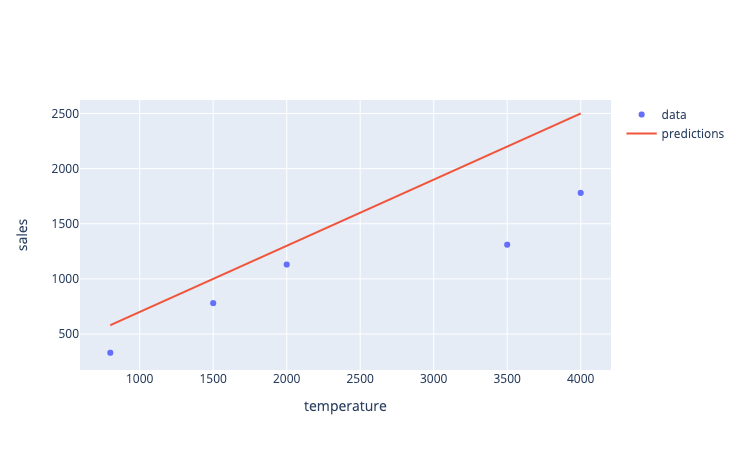

In [33]:
import plotly.graph_objects as go
import numpy as np
param = .6



prediction_vals = param*inputs + 100
diffs =  outcomes - prediction_vals
errors = dict(type='data', symmetric=False, array=diffs)

data_trace = go.Scatter(x = ad_spends, 
                              y = sales, 
                              mode = 'markers', 
                        name = 'data')

prediction_trace = go.Scatter(x = ad_spends, 
                              y = prediction_vals, 
                              mode = 'lines',
                              name = 'predictions')
layout = {'xaxis': {'title': 'temperature'}, 'yaxis': {'title': 'sales'}}
go.Figure(data = [data_trace, prediction_trace], layout = layout)

Now let's recalculate our total error.

In [38]:
param = .6
prediction_vals = param*inputs + 100
diffs =  outcomes - prediction_vals
SSE = np.sum(diffs**2)
SSE

1450300.0

### Summary

In this lesson, we saw how to evaluate a machine learning model.  We do this by seeing how well the model matches the actual data.  The closer the model is to the data, the better our model.  

We can summarize how well the model fits the data by calculating the error at each of our actual data points, where our $error =  actual - expected$.  We add up the error at each datapoint to calculate the **total error**.

Then we saw that **total error** has a flaw, where the errors can cancel each other out when some errors are positive and others are negative.  To fix this, we make each of our errors positive by squaring each error.  And then we add up our squared errors to calculate the **residual sum of the squares** (RSS).  We can use our RSS score to try different models and then choose the one with the lowest score.